# Generalized Linear Models
    
Logistic regression was a special case of a more general class of models called _generalized linear models_ (GLMs). In a GLM, the conditional distribution $p(Y \mid X=x)$ is modeled as an exponential family distribution whose mean parameter is a function of $X$. For example, if $Y \in \naturals$, we could model it with a Poisson GLM; if $Y \in \{1,\ldots,K\}$, we could model it as a categorical GLM. It turns out that many of the nice properties of logistic regression carry over to the more general case.


## Model
To construct a generalized linear model with exponential family observations, we set 
\begin{align*}
    \E[y_i \mid \mbx_i] &= f(\mbbeta^\top \mbx_i).
\end{align*}
    
From above, this implies,
\begin{align*}
    \nabla A(\eta_i) &= f(\mbbeta^\top \mbx_i) \\
    \Rightarrow \eta_i &= [\nabla A]^{-1} \big( f(\mbbeta^\top \mbx_i) \big),
\end{align*}
when $\nabla A(\cdot)$ is invertible. (In this case, the exponential family is said to be **minimal**).
    
The **canonical mean function** is $f(\cdot) = \nabla A(\cdot)$ so that $\eta_i = \mbbeta^\top \mbx_i$.
    
The (canonical) **link function** is the inverse of the (canonical) mean function.

### Logistic regression revisited
Consider the Bernoulli distribution once more. The gradient of the log normalizer is,
\begin{align*}
    \nabla A(\eta) &= \nabla \log (1 + e^\eta) 
    = \frac{e^\eta}{1+ e^\eta}
\end{align*}
This is the logistic function!

Thus, logistic regression is a Bernoulli GLM with the canonical mean function.

### Example: Poisson GLM

Recall that the Poisson distribution can be written in exponential family form as,
\begin{align*}
\mathrm{Po}(y; \lambda) 
&= \frac{1}{y!} \lambda^y e^{-\lambda} \\
&= \frac{1}{y!} \exp \left\{ y \log \lambda - \lambda  \right\} \\
&= h(y) \exp \left\{ \langle t(y), \eta \rangle - A(\eta) \right\} 
\end{align*}
where 
- $h(y) = 1/y!$, 
- $t(y) = y$, 
- $\eta = \log \lambda$
- $A(\eta) = e^\eta$. 

The canonical mean function is $f(x^\top \beta) = \nabla A(x^\top \beta) = e^{x^\top \beta}$. In words, in a canonical Poisson GLM, the mean is the exponentiated inner product of covariates and weights.

## Canonical case

Canonical mean functions lead to nice math. Consider the log joint probability,
\begin{align*}
    \cL(\mbbeta) 
    &= \sum_{i=1}^n \langle t(y_i), \eta_i \rangle - A(\eta_i)  + c \\
    &= \sum_{i=1}^n \langle t(y_i), \mbbeta^\top \mbx_i \rangle - A(\mbbeta^\top \mbx_i) + c,
\end{align*}
where we have assumed a canonical mean function so $\eta_i = \mbbeta^\top \mbx_i$.

### Gradient of the log likelihood
The gradient is,
\begin{align*}
    \nabla \cL(\mbbeta) 
    &= \sum_{i=1}^n \langle t(y_i), \mbx_i \rangle - \langle \nabla A(\mbbeta^\top \mbx_i), \, \mbx_i \rangle\\
    &= \sum_{i=1}^n \langle t(y_i) - \E[t(Y); \eta_i], \, \mbx_i \rangle
\end{align*}
where $\eta_i = \mbx_i^\top \mbbeta$ for a GLM with canonical link.

In many cases, $t(y_i) = y_i \in \reals$ so
\begin{align*}
    \nabla \cL(\mbbeta) 
    &= \sum_{i=1}^n (y_i - \hat{y}_i) \mbx_i.
\end{align*}

### Hessian of the log likelihood
When $t(y_i) = y_i$, the Hessian is
\begin{align*}
    \nabla^2_{\mbbeta} \cL(\mbbeta) 
    &= - \sum_{i=1}^n \nabla^2 A(\mbbeta^\top \mbx_i) \, \mbx_i \mbx_i^\top \\
    &= -\sum_{i=1}^n \Var[t(Y); \eta_i] \, \mbx_i \mbx_i^\top
\end{align*}

### Newton updates
Now recall the undamped Newton's method updates, written here in terms of the change in weights,
\begin{align*}
    \Delta \mbbeta &= - [\nabla^2 \cL(\mbbeta)]^{-1} \nabla \cL(\mbbeta) \\
    &= \left[\sum_{i=1}^n \Var[t(Y); \eta_i] \, \mbx_i \mbx_i^\top \right]^{-1} \left[\sum_{i=1}^n (y_i - \hat{y}_i) \mbx_i \right]
\end{align*}

Letting $w_i = \Var[t(Y); \eta_i]$,
\begin{align*}
    \Delta \mbbeta &=
    \left[\sum_{i=1}^n w_i \, \mbx_i \mbx_i^\top \right]^{-1} \left[ \sum_{i=1}^n (y_i - \hat{y}_i) \mbx_i \right] \\
    % &= (\mbX^\top \mbW \mbX)^{-1} [\mbX^\top \mbW \mbW^{-1} (\mby - \hat{\mby})] \\
    &= (\mbX^\top \mbW \mbX)^{-1} [\mbX^\top \mbW \hat{\mbz}]
\end{align*}
where $\mbW = \diag([w_1, \ldots, w_i])$ and $\hat{\mbz} = \mbW^{-1} (\mby - \hat{\mby})$. 

### Iteratively reweighted least squares
This is **iteratively reweighted least squares (IRLS)** with weights $w_i$ and working responses 
\begin{align*}
\hat{z}_i = \mbx_i^\top \mbbeta_t + \frac{y_i - \hat{y}_i}{w_i},
\end{align*} 
both of which are functions of the current weights $\mbbeta$.

As in logistic regression, the working responses can be seen as linear approximations to the observed responses mapped back through the link function.

## Demo: Neural Spike Train Analysis

A fundamental question in neuroscience is how sensory inputs are encoded in neural activity. More precisely, how does past stimulus influence the firing rate of this neuron? One way to answer this question is by fitting a Poisson GLM to predict a neuron's firing rate as a function of the past stimulus. Here, we will demonstrate this approach by fitting a Poisson GLM to neural spike train recordings from a retinal ganglion cell. This example is adapted from [Jonathan Pillow's tutorial](https://github.com/pillowlab/GLMspiketraintutorial), using data that was collected in E.J. Chichilnisky's lab.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from torch.distributions import Poisson

/Users/scott/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load and plot the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/slinderman/stats305b/winter2025/data/05_spikes.csv")
df

t  stim  y0  y1  y2  y3
0      0.008341 -0.48   0   0   0   0
1      0.016681  0.48   0   0   0   0
2      0.025022  0.48   1   1   0   0
3      0.033362  0.48   0   0   0   0
4      0.041703 -0.48   0   0   0   0
...         ...   ...  ..  ..  ..  ..
9995  83.372688  0.48   0   0   1   0
9996  83.381028 -0.48   0   0   0   0
9997  83.389369 -0.48   0   0   0   0
9998  83.397709 -0.48   0   0   0   0
9999  83.406050 -0.48   1   1   0   0

[10000 rows x 6 columns]

The columns of the data frame are
- `t`: time stamp for each time bin
- `stim` : the intensity of the visual stimulus (scalar) in each bin
- `yj` for `j=0,...,3`: the number of spikes fired by neuron `j` in each bin

In [3]:
# Plot stimulus and number of spikes for neuron 0
t = torch.as_tensor(df.t)
stim = torch.as_tensor(df.stim)
Y = torch.as_tensor([df.y0, df.y1, df.y2, df.y3]).T
slc = slice(0, 120)

# Plot the spike times and stimulus
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
for j in range(4):
    axs[0].plot(t[slc], torch.where(Y[slc, j] > 0, j, torch.nan), 'k|', ms=8, label='spikes')
axs[0].set_title("spike times")
axs[0].set_yticks(torch.arange(4))
axs[0].set_ylabel("neuron index")
axs[0].set_ylim(3.5, -0.5)

axs[1].imshow(stim[slc][None, :], aspect='auto', cmap='gray', extent=(t[slc][0], t[slc][-1], 0, 1))
axs[1].set_xlabel("time $t$ [sec]")
axs[1].set_yticks([])
axs[1].set_title("binary white noise stimulus")
plt.tight_layout()

### Set up the features and responses

Let's start by modeling the spike count of neuron 0, so $y_i$ will be `df.y0[i]`.

For the covariate, Let $s_i$ denote the stimulus in bin $i$. Our covariates will be $\mbx_i = (1, s_i, s_{i-1}, \ldots, s_{i-L+1})$, an intercept together with a vector of lagged stimulus values.  $L$ denotes the number of past time bins that could influence the rate at time $i$ under our model. 

In [4]:
# Set the responses
y = Y[:, 0]

# Set up the design matrix
L = 25
X = torch.zeros(len(stim), L+1)
X[:, 0] = 1                             # bias term
for l in range(L):                      # lagged stimulus
    X[l:, l+1] = stim[:len(stim)-l]

plt.imshow(X[:100], aspect="auto", cmap="Greys")
plt.xlabel(r"lag $\ell$")
plt.ylabel(r"time bin $i$")
plt.colorbar()
plt.title("design matrix $X$")
plt.tight_layout()

Now we will fit a Poisson GLM with the exponential mean function,
\begin{align*}
\hat{y}_i = \E[y_i \mid x_i, \beta] = f(x_i^\top \beta) &= e^{x_i^\top \beta}.
\end{align*}

We'll fit the model with Newton's method. From the derivations above, the gradient is 
\begin{align*}
    \nabla \cL(\mbbeta) 
    &= \sum_{i=1}^n (y_i - \hat{y}_i) \mbx_i \\
    &= \sum_{i=1}^n (y_i - e^{x_i^\top \beta}) \mbx_i 
\end{align*}
and the Hessian is,
\begin{align*}
    \nabla^2_{\mbbeta} \cL(\mbbeta) 
    &= -\sum_{i=1}^n w_i \mbx_i \mbx_i^\top
\end{align*}
where $w_i = \Var[Y_i; x_i, \beta] = e^{x_i^\top \beta}$. 


In [5]:
# Helper function to compute the average log likelihood
avg_log_lkhd = lambda beta: Poisson(rate=torch.exp(X @ beta)).log_prob(y).mean()

# Helper function to perform one the Newton step
def newton_step(beta, stepsize=1.0):
    # Compute gradient
    yhat = torch.exp(X @ beta)
    g = X.T @ (y - yhat)
    
    # Compute Hessian
    w = yhat # the variance equals the mean in a Poisson GLM
    H = -(X.T * w) @ X
    
    # Update parameter estimate
    return beta - stepsize * torch.linalg.solve(H, g)


# Run Newton's method, initialized at \beta = 0
num_iters = 10
beta = torch.zeros(L+1)
lls = [avg_log_lkhd(beta)]
for itr in range(num_iters):
    beta = newton_step(beta)
    lls.append(avg_log_lkhd(beta))

lls = torch.as_tensor(lls)

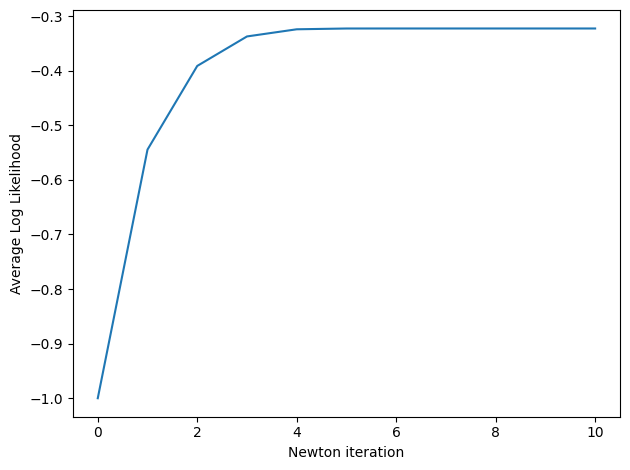

In [6]:
plt.plot(lls)
plt.xlabel("Newton iteration")
plt.ylabel("Average Log Likelihood")
plt.tight_layout()

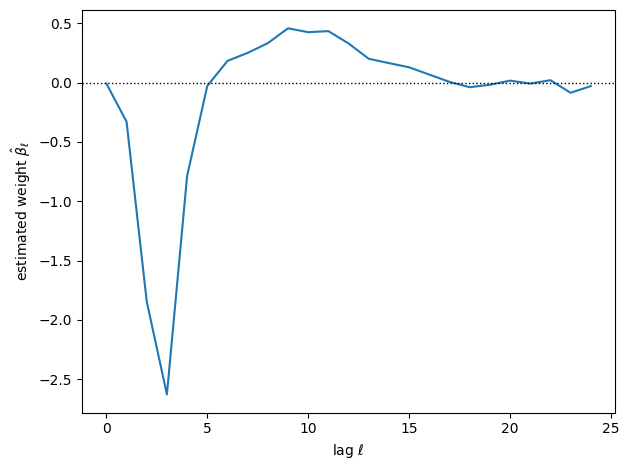

In [7]:
plt.plot(torch.arange(L), beta[1:])
plt.xlabel(r"lag $\ell$")
plt.ylabel(r"estimated weight $\hat{\beta}_{\ell}$")
plt.axhline(0, color='k', lw=1, ls=':')
plt.tight_layout()

:::{admonition} Exercise
:class: tip
How could you put confidence intervals on this estimate?
:::

In [8]:
# Now plot the predicted firing rates, yhat
yhat = torch.exp(X @ beta)
plt.plot(t[slc], yhat[slc], label='predicted rate')
plt.plot(t[slc], torch.where(y[slc] > 0, y[slc], torch.nan), 'ro', label='spikes')
plt.xlabel("time $t$")
plt.ylabel("predicted rate and observed spikes")
plt.legend()
plt.tight_layout()

## Non-canonical case

When we choose an arbitrary mean function, the expressions are a bit more complex. Let's focus on the case where $t(y_i) = y_i$ for scalar $y_i$, but allow for arbitrary mean function $f$. 
\begin{align*}
    \cL(\mbbeta) 
    &= \sum_{i=1}^n \langle y_i, \eta_i \rangle - A(\eta_i)  + c,
\end{align*}
but now $\eta_i = [\nabla A]^{-1} f(\mbbeta^\top \mbx_i)$. 

The gradient is,
\begin{align*}
    \nabla \cL(\mbbeta) 
    &= \sum_{i=1}^n \left(y_i - \hat{y}_i\right) \frac{\partial \eta_i}{\partial \mbbeta}.
\end{align*}

Applying the inverse function theorem, as above, yields,
\begin{align*}
\frac{\partial \eta_i}{\partial \mbbeta} 
&= \mathrm{Var}[Y]^{-1} \mbx_i = \mbx_i / w_i,
\end{align*}
and
\begin{align*}
    \nabla \cL(\mbbeta) 
    &= \sum_{i=1}^n \left(\frac{y_i - \hat{y}_i}{w_i} \right) f'(\mbbeta^\top \mbx_i) \mbx_i.
\end{align*}

## Deviance and Goodness of Fit

We can perform maximum likelihood estimation via Newton's method, but do the resulting parameters $\hat{\mbbeta}_{\mathsf{MLE}}$ provide a good fit to the data? One way to answer this question is by comparing the fitted model to two reference points: a **saturated** model and a **baseline** model.

For binomial GLMs (including logistic regression) and Poisson GLMs, the saturated model conditions on the mean equaling the observed response. For example, in a Poisson GLM the saturated model's log probability is,
\begin{align*}
\log p_{\mathsf{sat}}(\mby) 
&= \sum_{i=1}^n \log \mathrm{Po}(y_i; y_i) \\
&= \sum_{i=1}^n -\log y_i! + y_i \log y_i - y_i.
\end{align*}

The likelihood ratio statistic in this case is 
\begin{align*}
-2 \log \frac{p(\mby \mid \mbX; \hat{\mbbeta})}{p_{\mathsf{sat}}(\mby)} 
&= 2 \sum_{i=1}^n \log \mathrm{Po}(y_i; y_i) - \log \mathrm{Po}(y_i; \hat{\mu}_i)\\
&= 2 \sum_{i=1}^n y_i \log \frac{y_i}{\hat{\mu}_i} + \hat{\mu}_i - y_i \\
&= \sum_{i=1}^n r_{\mathsf{D}}(y_i, \hat{\mu}_i)^2
\end{align*}
where $\hat{\mu}_i = f(\mbx_i^\top \hat{\mbbeta})$ is the predicted mean. 
We recognize the likelihood ratio statistic as the sum of squared deviance residuals! (See the [previous chapter](expfam:deviance_residuals) ) 

Moreover, this statistic is just the deviance (twice the KL divergence) between the two models,
\begin{align*}
2 \KL{p_{\mathsf{sat}}(\mbY)}{p(\mbY \mid \mbX=\mbx; \hat{\mbbeta})}
&= 2 \E_{p_{\mathsf{sat}}} \left[\log \frac{p_{\mathsf{sat}}(\mby)}{p(\mby \mid \mbX; \hat{\mbbeta})} \right] \\
&= 2 \sum_{i=1}^n \KL{\mathrm{Po}(y_i)}{\mathrm{Po}(\hat{\mu}_i)} \\
&\triangleq D(\mby, \hat{\mbmu}).
\end{align*}
We've shown the deviance for the case of a Poisson GLM, but the same idea holds for GLMs with other exponential family distributions. Larger deviance implies a poorer fit. 

The baseline model is typically a GLM with only an intercept term, in which case the MLE is $\mu_i \equiv \frac{1}{n} \sum_{i=1}^n y_i = \bar{y}$. For that baseline model, the deviance is,
\begin{align*}
D(\mby, \bar{y} \mbone)
&= 2 \sum_{i=1}^n y_i \log \frac{y_i}{\bar{y}} + \bar{y} - y_i \\
&= 2 \sum_{i=1}^n y_i \log \frac{y_i}{\bar{y}} 
\\
&= \sum_{i=1}^n r_{\mathsf{D}}(y_i, \bar{y})^2.
\end{align*}

:::{admonition} Note on intercepts
In models with an (unregularized) intercept term, the MLE should be such that $\sum \mu_i = \sum y_i$, which simplifies the deviance.
:::

### Fraction of Deviance Explained
As with linear models where we use the fraction of variance explaiend ($R^2$), in GLMs we can consider the fraction of _deviance_ explained. Note that the deviance is positive for any model that is not saturated. The **fraction of deviance explained** is $1 - \frac{D(\mby; \hat{\mbmu})}{D(\mby; \bar{y} \mbone)}$. Unless your model is worse than guessing the mean, the fraction of deviance explained is between 0 and 1. 

### Revisiting the Poisson GLM for Neural Spike Train

Let's go back to neural spike train analysis above and compute the fraction of deviance explained.

In [9]:
ll_model = avg_log_lkhd(beta)
ll_sat = Poisson(rate=y.float()).log_prob(y).mean()
ll_baseline = Poisson(rate=y.float().mean()).log_prob(y).mean()

dev_model = -2 * (ll_model - ll_sat)
dev_baseline = -2 * (ll_baseline - ll_sat)
frac_dev_explained = 1 - dev_model / dev_baseline
print(f"Fraction of deviance explained: {frac_dev_explained:.2f}")

Fraction of deviance explained: 0.52


:::{admonition} Exercise
:class: tip
What covariates could you add to this model to improve the model fit? Try it out!
:::

### Model Comparison 
The difference in deviance between two models with predicted means $\hat{\mbmu}_0$ and $\hat{\mbmu}_1$, the difference in deviance,
\begin{align*}
D(\mby; \hat{\mbmu}_0) - D(\mby; \hat{\mbmu}_1)
\end{align*}
has an approximately chi-squared null distribution. We can use this fact to sequentially add or subtract features from a model depending on whether the change in deviance is significant or not. 

### Model Checking
Just like in standard linear models, we should inspect the residuals in generalized linear models for evidence of model misspecification. For example, we can plot the residuals as a function of $\hat{\mu}_i$ and they should be approximately normal at all levels of $\hat{\mu}_i$.

## Cross-Validation

Finally, another common approach to model selection and comparison is to use cross-validation. The idea is to approximate out-of-sample predictive accuracy by randomly splitting the training data. 

**Leave-one-out cross validation (LOOCV)** withholds one datapoint out at a time, estimates parameters using the other $n-1$, and then evaluates predictive likelihood on the held out datapoint.

This approximates,
\begin{align}
    \E_{p^\star(x, y)}[\log p(y \mid x, \{x_i, y_i\}_{i=1}^n)] &\approx
    \frac{1}{n} \sum_{i=1}^n \log p(y_i \mid x_i, \{x_j, y_j\}_{j \neq i}).
\end{align}
where $p^\star(x, y)$ is the true data generating distribution

For small $n$ (or when using a small number of folds), a bias-correction can be used. 
<!-- (See pg. 175-176 of the book.) -->

Cross-validated predictive log likelihood estimates are similar to the \emph{jackknife} resampling method in the sense that it is estimating an expectation wrt the unknown data-generating distribution $p^\star$ by resampling the given data. 

## Conclusion

Generalized linear models allow us to build flexible regression models that respect the domain of the response variable. Logistic regression is a special case of a Bernoulli GLM with the canonical link function. For categorical data, we could use a categorical distribution with the softmax link function, and for count data, we could use a Poisson GLM with exponential, softplus, or other link functions. Leveraging the deviance and deviance residuals for exponential family distribiutions, we can derive analogs of familiar terms from linear modeling, like the fraction of variance explained and the residual analysis. 

Next, we'll consider techniques for Bayesian analysis in GLMs, which allow for more expressive moodels. That will give us an excuse to _finally_ dig into Bayesian inference methods.